<a href="https://colab.research.google.com/github/codemishka/Project-2/blob/main/1694767161664_Project_2_Core__1___2___3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 - Part 1 (Core)
> Mishka Janghbahadur

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [ ]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df1[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

In [ ]:
def plot_categorical_vs_target(df, x, y='income',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax



In [ ]:
def plot_numeric_vs_target(df, x, y='income', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

# Part 1: Adult income dataset

1. Source of data
>https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download
2. Brief description of data

>An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
Fields
>The dataset contains 16 columns
Fields
>The dataset contains 16 columns
>-- The income is divide into two classes: <=50K and >50K
>Number of attributes: 14
>-- These are the demographics and other features to describe a person

>We can explore the possibility in predicting income level based on the individual’s personal information

>-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14

>-- These are the demographics and other features to describe a person

>We can explore the possibility in predicting income level based on the individual’s personal information.

3. What is the target?
>Target filed: Income
4. What does one row represent? (A person? A business? An event? A product?)
>Each row represents a singular individual and that individual's data related to their economic circumstances

5. Is this a classification or regression problem?
>binary regression

6. How many features does the data have?
>14 features, one target
7. How many rows are in the dataset?
>48842
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
>missing values and inconsistent object data

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import pandas and change max columns
import pandas as pd
pd.set_option('display.max_columns',100)
fpath1 = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/adult.csv"
df1 = pd.read_csv(fpath1)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Remove duplicates
df1 = df1.drop_duplicates()
df1.duplicated().sum()

0

In [ ]:
# Saving list of column names for object cols
cat_cols1 = df1.select_dtypes('object').columns
cat_cols1

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [ ]:
# Checking which categorical columns had missing values.
df1[cat_cols1].isna().sum()
#nothing to fix

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [ ]:
# Saving list of column names for numeric cols
num_cols1 = df1.select_dtypes('number').columns
num_cols1

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [ ]:
# Checking which numerical columns had missing values.
df1[num_cols1].isna().sum()
#nothing to fix

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

In [ ]:
df1.describe().round(2)
#age,fnlwgtm,educational-num, capital-loss and	hours-per-week have some outliers but they are not impossible.
#fix capital gain column

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.00,48790.00,48790.00,48790.00,48790.00,48790.00
mean,38.65,189669.00,10.08,1080.22,87.60,40.43
std,13.71,105617.23,2.57,7455.91,403.21,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117555.00,9.00,0.00,0.00,40.00
50%,37.00,178138.50,10.00,0.00,0.00,40.00
75%,48.00,237606.25,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [ ]:
cap_gain_max = df1['capital-gain'] >90000

df1[cap_gain_max]
#actually many values exist over 90000, so this data is normal.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [ ]:
for col in cat_cols1:
    print(f'- {col}:')
    print(df1[col].value_counts(dropna=False))
    print("\n\n")
    #fix '?' in workclass with "unknown"
    #fix '?' in occupation with "unknown"
    #fix '?' in native country with "unknown"

- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- education:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



- marital-status:
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64



- occupation:
Prof-specialty       6165
Craft-rep

In [ ]:
df1['workclass'] = df1['workclass'].replace('?','Unknown')
df1['occupation'] = df1['occupation'].replace('?','Unknown')
df1['native-country'] = df1['native-country'].replace('?','Unknown')

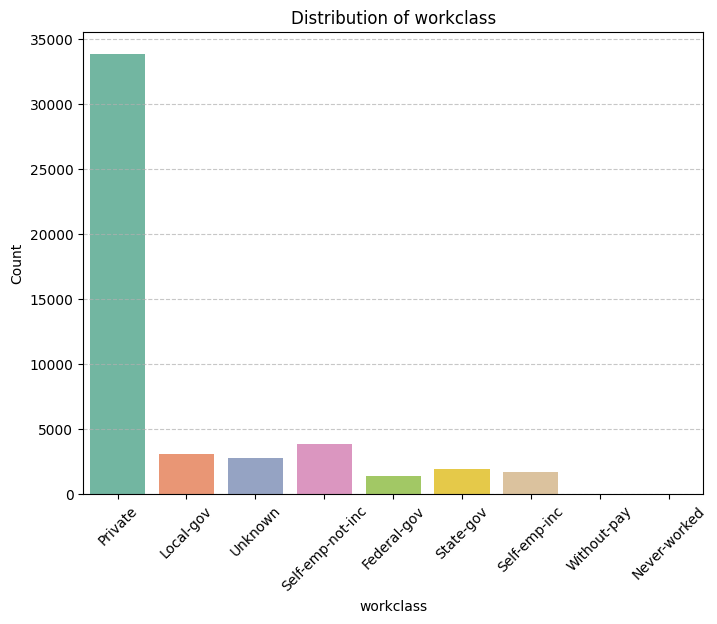

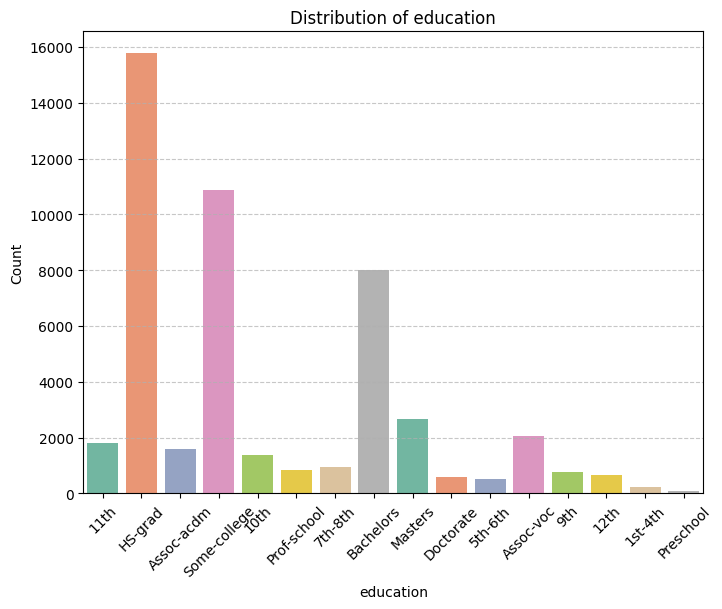

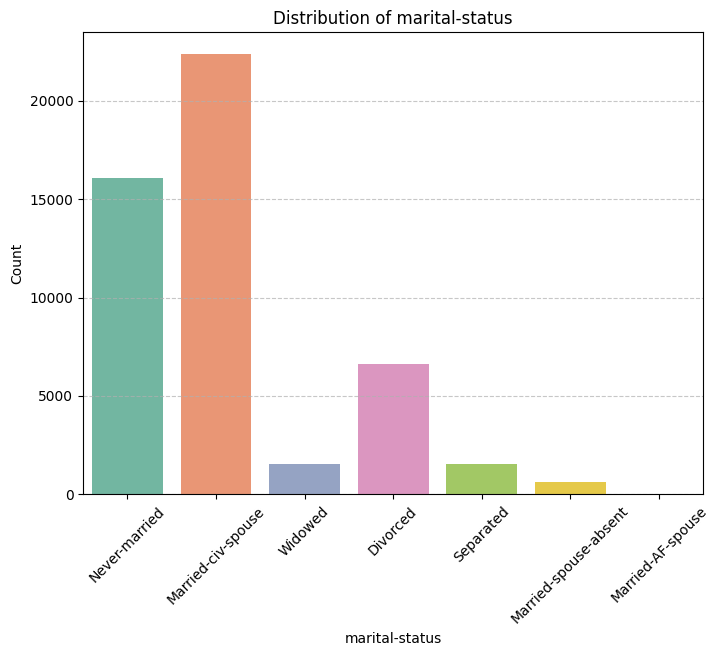

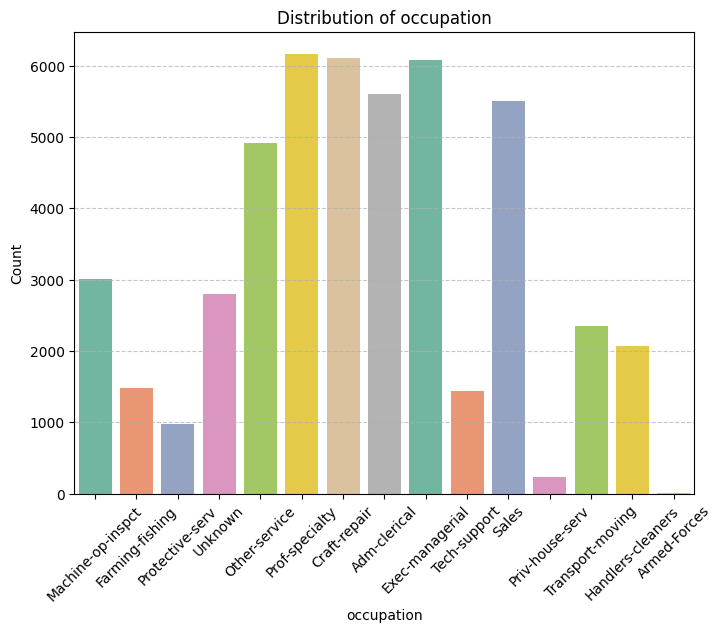

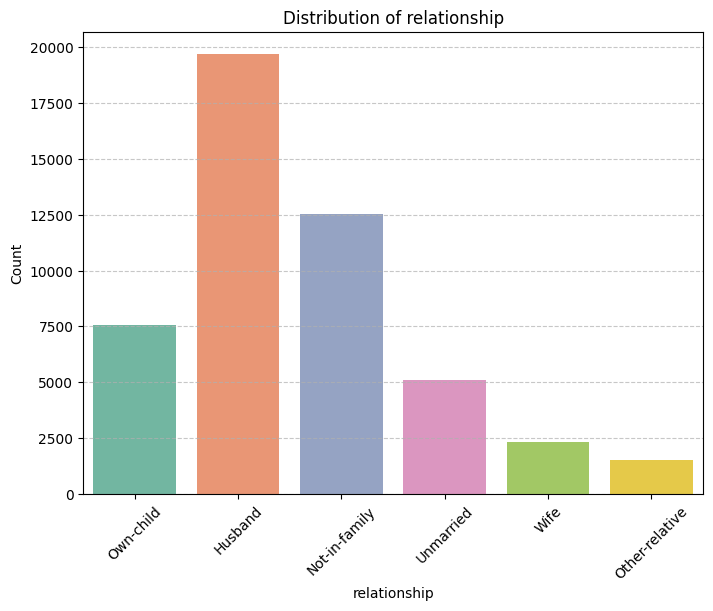

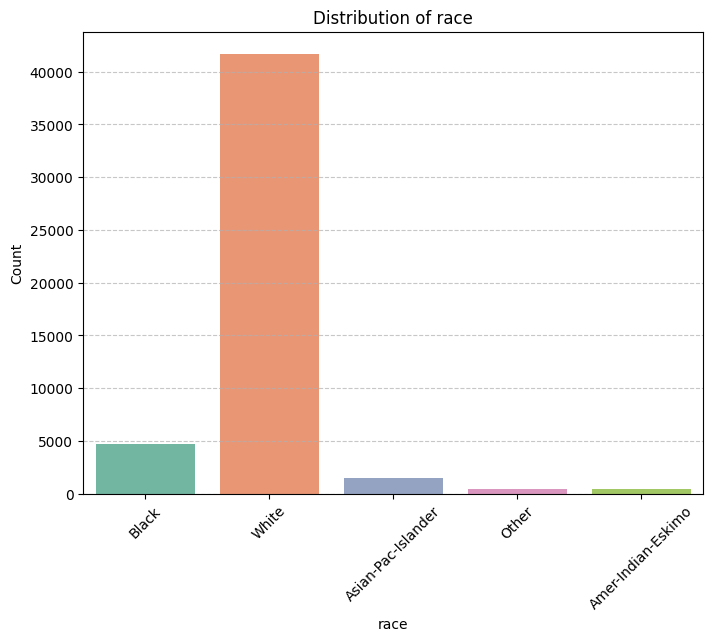

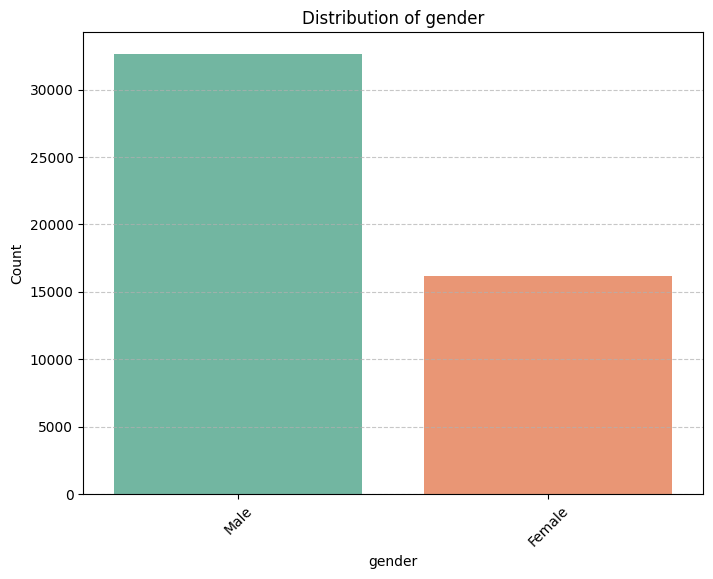

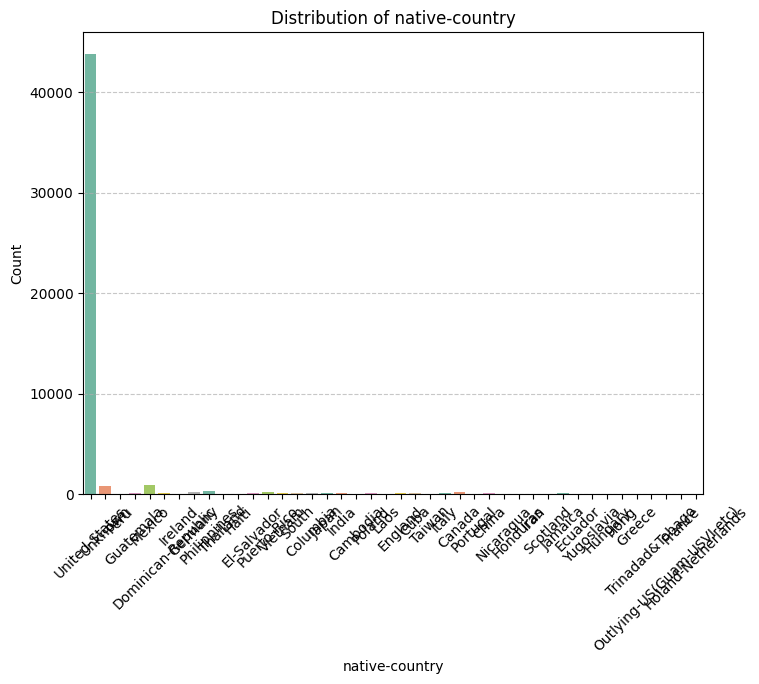

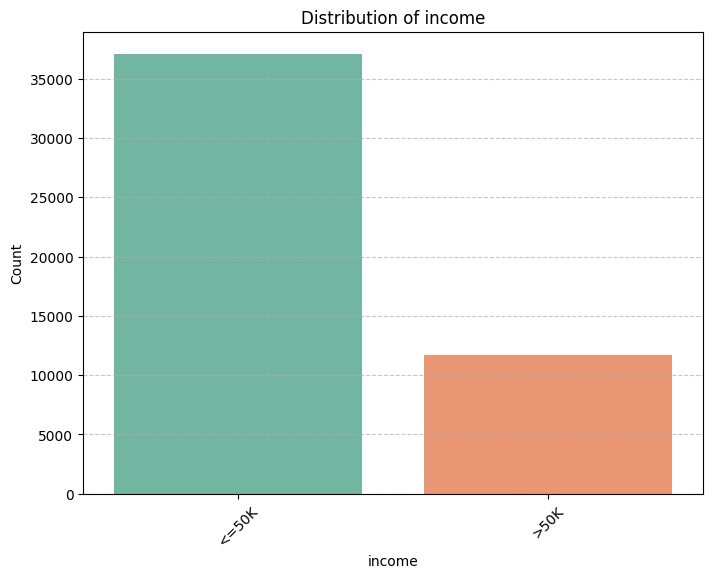

In [ ]:
# Categorical Variables

for col in cat_cols1:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df1, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

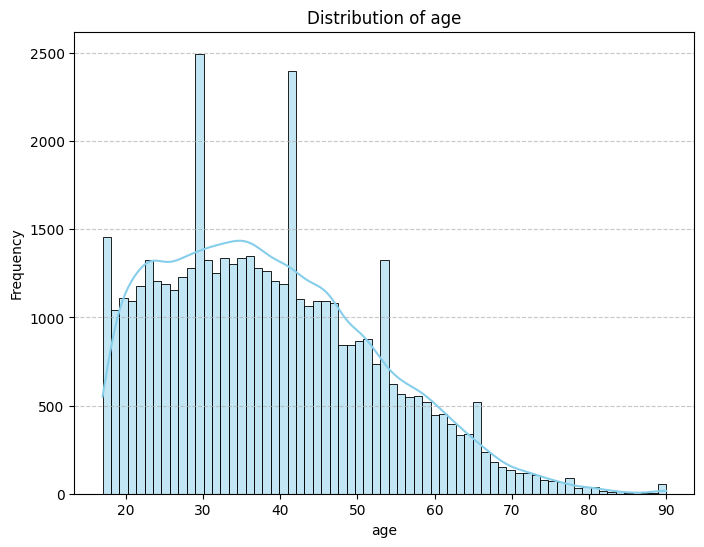

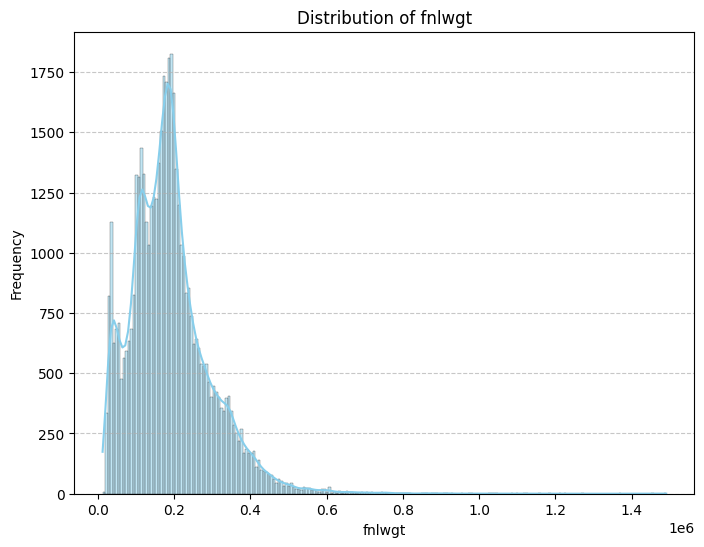

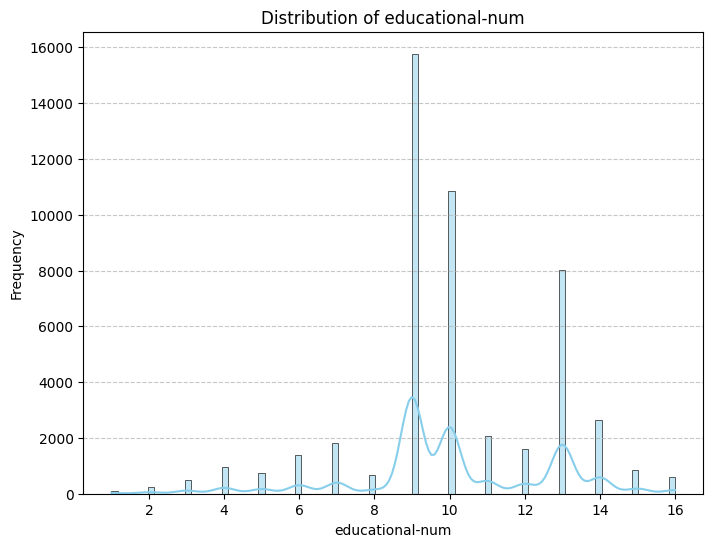

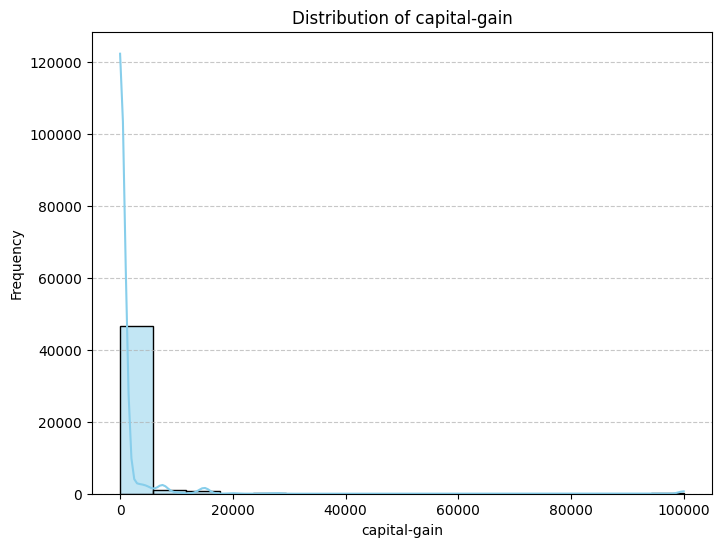

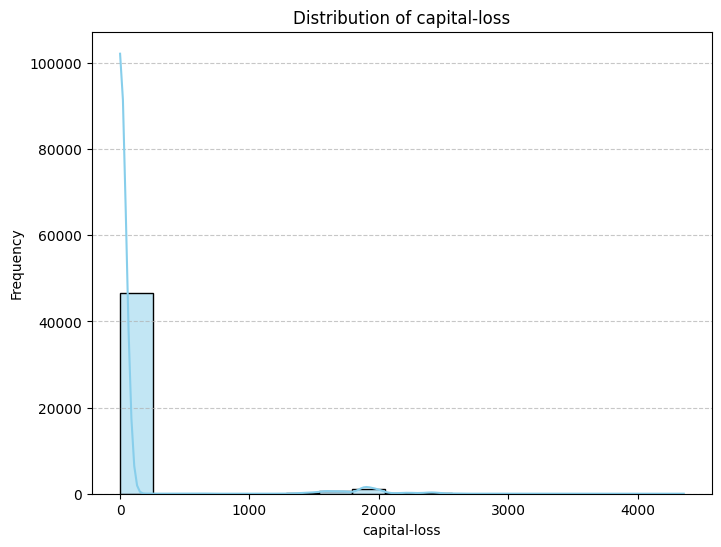

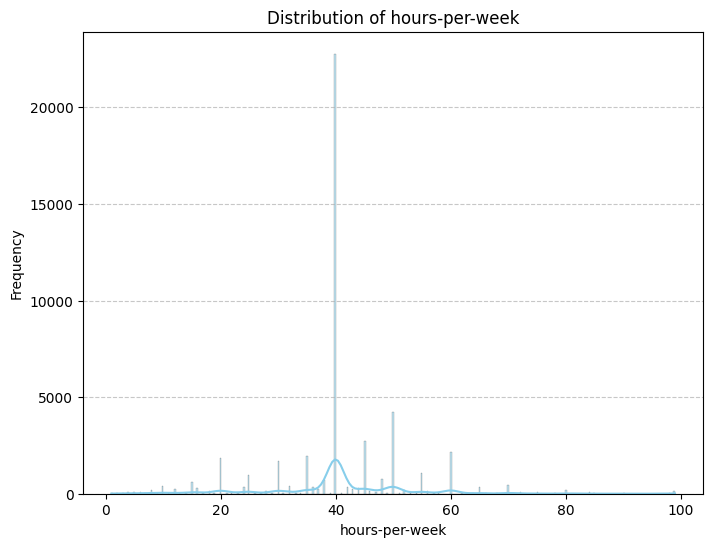

In [ ]:
# Numeric Variables

num_cols = df1.select_dtypes(['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df1, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

<ipython-input-72-24d4f254e388>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True,cmap='coolwarm');


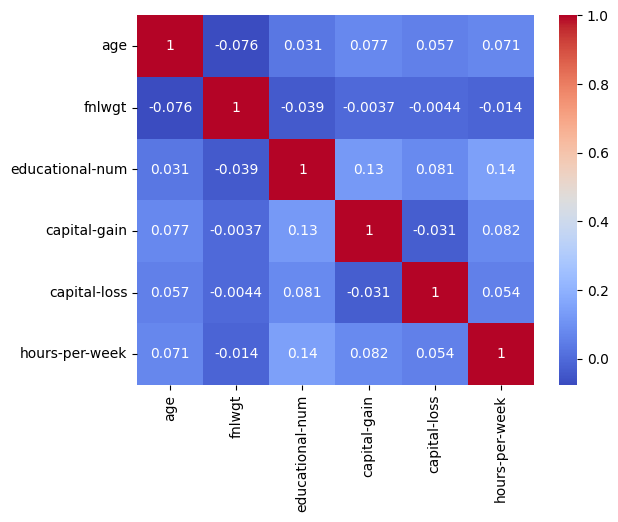

In [ ]:
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm');

The correlation heat map shows whether there are any strong relationships between features. No correlations can be derived directly as the target(income) is not a feature in the matrix- we need to fix this.

However for now, we will continue to explore some fields we can discern would be a predictor of income.

<ipython-input-57-2fa141435a82>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


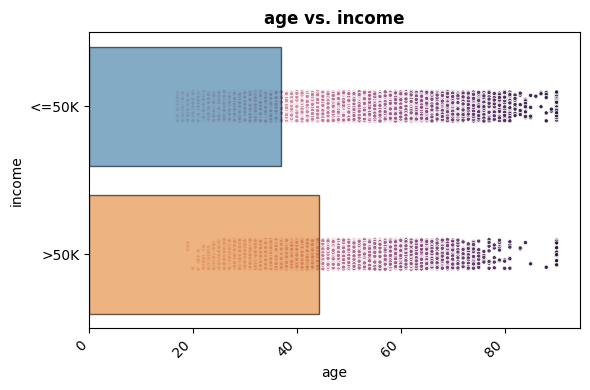

In [ ]:
# Test with an order argument
fig, ax = plot_age_vs_target(df1, x='age', fillna=False,)

The above graph shows that as age increases, the number of instances of an individual earning a higher income increases.

In [ ]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in df1[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

Text(24.0, 0.5, 'Proportion of population')

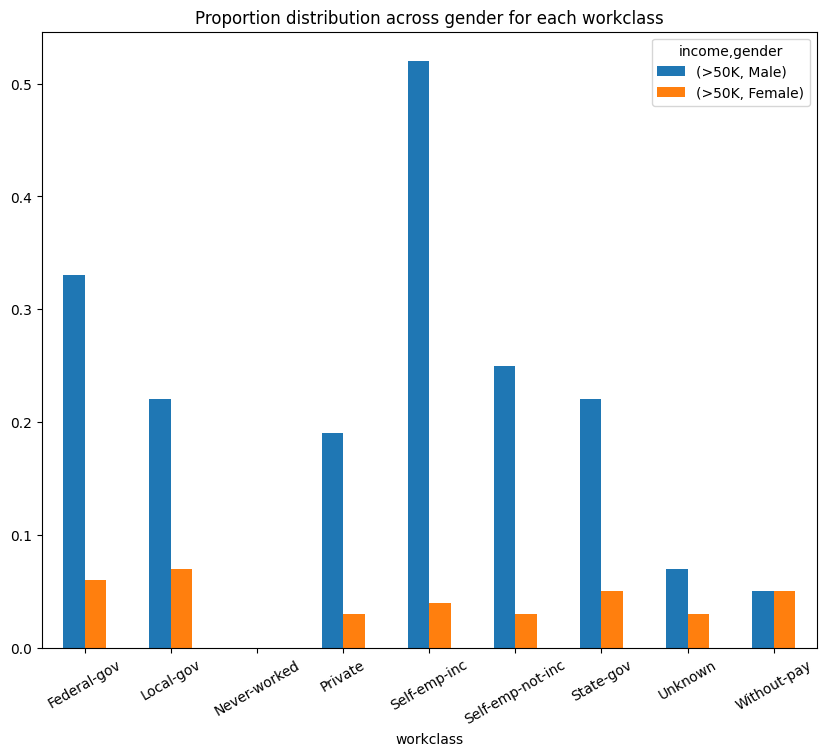

In [ ]:
gender_workclass = round(pd.crosstab(df1.workclass, [df1.income, df1.gender]).div(pd.crosstab(df1.workclass, [df1.income, df1.gender]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

Taking a closer look at the disparity in income between men and women, plot the proportion of men and women who earn more than 50k a year, across all the working  classes as seen in the figure. We see that men always have a higher proportion earning  more than 50k a year than women, except for the'without.pay working class, where they have the same proportion

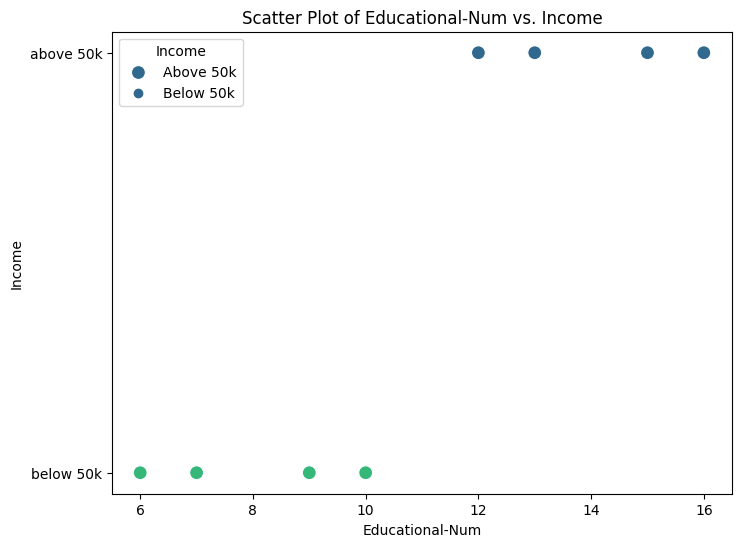

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset
data = {
    "Income": ["above 50k", "above 50k", "below 50k", "above 50k", "below 50k", "below 50k", "above 50k", "below 50k"],
    "Educational-Num": [13, 16, 9, 12, 10, 6, 15, 7]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Educational-Num', y='Income', data=df, hue='Income', palette='viridis', s=100)
plt.title('Scatter Plot of Educational-Num vs. Income')
plt.xlabel('Educational-Num')
plt.ylabel('Income')
plt.legend(title='Income', loc='upper left', labels=['Above 50k', 'Below 50k'])
plt.show()

The above scatter plot shows that there is a positive correlation between the Educational-Num and the Income. Clearly, after numverous years of education, an individual is more likely to earn more than 50k a year.

# Part 2: Stroke Prediction Dataset

1. Source of data
>https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
2. Brief description of data
>This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.


3. What is the target?
> Stroke(either true or not)
4. What does one row represent? (A person? A business? An event? A product?)
>Each row represents a singular individual and that individual's data related to their health

5. Is this a classification or regression problem?
>binary regression

6. How many features does the data have?
>11 features, one target
7. How many rows are in the dataset?
>44678
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
>missing values and inconsistent object data

In [ ]:
fpath2 = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv"
df2 = pd.read_csv(fpath2)
df2.head()

In [ ]:
# Remove duplicates
df2 = df2.drop_duplicates()
df2.duplicated().sum()

In [ ]:
# Set the index to PID
df2 = df2.set_index("id")

In [ ]:
df2.head()

In [ ]:
# Saving list of column names for object cols
cat_cols2 = df2.select_dtypes('object').columns
cat_cols2

In [ ]:
# Checking which categorical columns had missing values.
df2[cat_cols2].isna().sum()
#nothing to fix

In [ ]:
# Saving list of column names for numeric cols
num_cols2 = df2.select_dtypes('number').columns
num_cols2

In [ ]:
# Checking which numerical columns had missing values.
df2[num_cols2].isna().sum()
#fix bmi

In [ ]:
median_value = df2['bmi'].median()
df2['bmi'] = df2['bmi'].fillna(median_value)
#fixed missing numeric values with median

In [ ]:
df2.describe().round(2)
#only the bmi column data seems to have impossible max values.

In [ ]:
bmi_over_70 = df2['bmi'] > 70

df2[bmi_over_70]


In [ ]:
df2.drop(index=545, inplace = True)
df2.drop(index=41097, inplace = True)
df2.drop(index=56420, inplace = True)
df2.drop(index=51856, inplace = True)
#dropped outliers with bmi over 70

In [ ]:
for col in cat_cols2:
    print(f'- {col}:')
    print(df2[col].value_counts(dropna=False))
    print("\n\n")
    #remove 'Other' from gender data

In [ ]:
# Create a filter for Packaging values that contain "individual"
filter_gender = df2['gender'].str.contains('Other')
# Apply the filter
df2.loc[filter_gender]

In [ ]:
# Use the inversion operator to get all values that do NOT meet the filter conditions
df2=df2[~filter_gender]
df2

In [ ]:
# Categorical Variables

for col in cat_cols2:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df2, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
# Numeric Variables

num_cols = df2.select_dtypes(['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df2, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm');